In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [100]:
# 関数群
def read_convergence_log(obj,isScatter=False):
    filepath = obj["filepath"]
    name = obj["name"]
    df = pd.read_csv(filepath,names=["timestamp", name])
    if isScatter:
        df["amount"] = name
        df["data"] = df[name]
    return df


def create_merged(elements,isScatter=False):
    dfs =[read_convergence_log(obj,isScatter=isScatter) for obj in  elements]
    merged = pd.concat(dfs,sort=True)
    merged = merged.set_index("timestamp")
    merged = merged.astype(float)
    return merged


def draw_convergence_plot(merged_df,type_name="add"):
    if type_name == "add":
        colormap = 'Set1'
    elif type_name == "remove":
         colormap = 'tab10'
    else:
        clormap = "Dark2"
    
    # 頭を作る
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    
    # 箱ひげ図
    merged_df.plot.box(title=type_name,showfliers=False, ax=ax,colormap="Accent_r")
    ax.set_xlabel("amount of initial servers")
    ax.set_ylabel("time(sec)")
    # 中央値に線を引く
    mean = merged_df.mean()
    mean.index = np.arange(1,len(mean)+1)
    mean.plot(ax=ax,xlim=[0,10],ylim=[0,20],colormap=colormap)
    

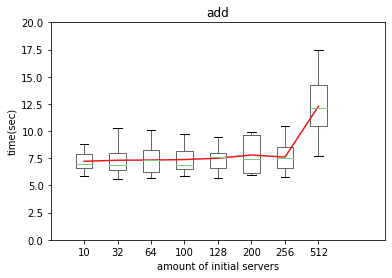

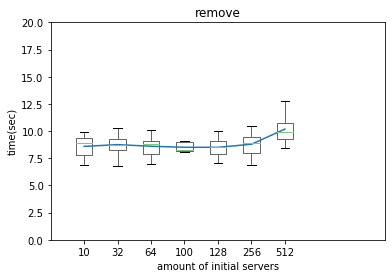

In [104]:
# 読み込む
add_list = [
    {
        "filepath":"../ansible_setup/backup/operation/convergence_10_add.txt",
        "name": 10
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_32_add.txt",
        "name": 32
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_64_add.txt",
        "name": 64
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_100_add.txt",
        "name": 100
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_128_add.txt",
        "name": 128
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_200_add.txt",
        "name": 200
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_256_add.txt",
        "name": 256
    },
#   {
#       "filepath":"../ansible_setup/backup/operation/convergence_300_add.txt",
#       "name": 300
#   },
#   {
#       "filepath":"../ansible_setup/backup/operation/convergence_400_add.txt",
#       "name": 400
#    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_512_add.txt",
        "name": 512
    }
]

remove_list  = [
    {
        "filepath":"../ansible_setup/backup/operation/convergence_10_remove.txt",
        "name": 10
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_32_remove.txt",
        "name": 32
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_64_remove.txt",
        "name": 64
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_100_remove.txt",
        "name": 100
    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_128_remove.txt",
        "name": 128
    },
#    {
#        "filepath":"../ansible_setup/backup/operation/convergence_200_remove.txt",
#        "name": 200
#    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_256_remove.txt",
        "name": 256
    },
#     {
#       "filepath":"../ansible_setup/backup/operation/convergence_300_remove.txt",
#        "name": 300
#    },
#     {
#       "filepath":"../ansible_setup/backup/operation/convergence_400_remove.txt",
#        "name": 400
#    },
    {
        "filepath":"../ansible_setup/backup/operation/convergence_512_remove.txt",
        "name": 512
    }
]

add_merged = create_merged(add_list)
remove_merged =create_merged(remove_list)

# 図を作る
draw_convergence_plot(add_merged,"add")
draw_convergence_plot(remove_merged,"remove")

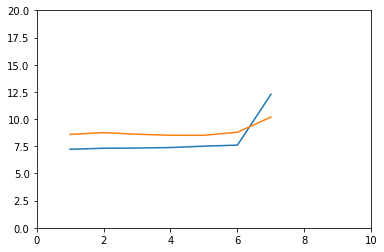

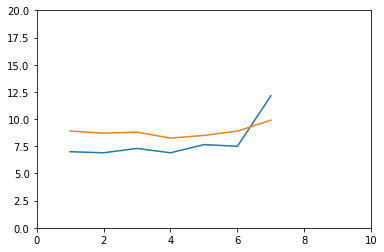

In [102]:
# 平均値のグラフ
fig_mean = plt.figure(figsize=(6,4))
ax_mean = fig_mean.add_subplot(111)
add_mean = add_merged.mean()
add_mean.index = np.arange(1,len(add_mean)+1)
add_mean.plot(ax=ax_mean)
remove_mean = remove_merged.mean()
remove_mean.index = np.arange(1,len(remove_mean)+1)
remove_mean.plot(ax=ax_mean,xlim=[0,10],ylim=[0,20])


# 中央値のグラフ
fig_median = plt.figure(figsize=(6,4))
ax_median = fig_median.add_subplot(111)
add_median = add_merged.median()
add_median.index = np.arange(1,len(add_median)+1)
add_median.plot(ax=ax_median)
remove_median= remove_merged.median()
remove_median.index = np.arange(1,len(remove_median)+1)
remove_median.plot(ax=ax_median,xlim=[0,10],ylim=[0,20])

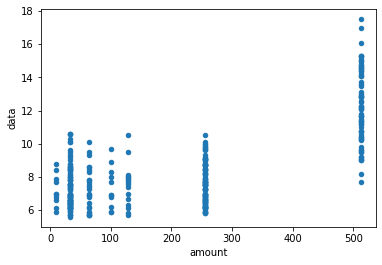

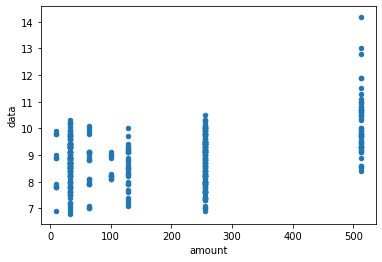

In [103]:
# scatterを出力
add_merged_for_scatter = create_merged(add_list,True)
removed_merged_for_scatter = create_merged(remove_list,True)
add_merged_for_scatter.plot(kind="scatter",x="amount",y="data")
removed_merged_for_scatter.plot(kind="scatter",x="amount",y="data")